# imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

cancer = load_breast_cancer()

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)


# selecionando features

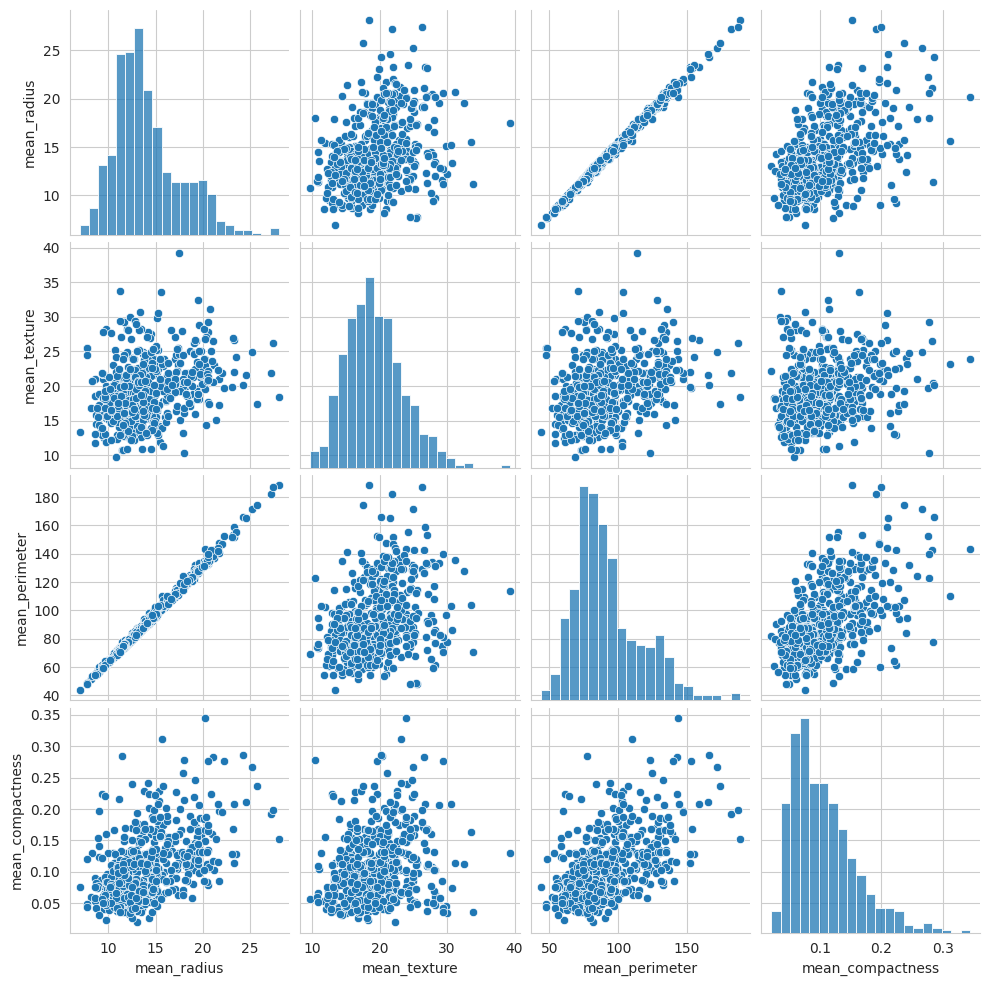

In [17]:

y_regressao = 'mean area'

df_regressao = df_cancer.copy()
df_regressao['Y'] = df_regressao[y_regressao]
df_regressao = df_regressao.drop(columns=[y_regressao])


df_regressao.columns = df_regressao.columns.str.replace(' ', '_')
features_independentes_exemplo = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_compactness']

seaborn.pairplot(df_regressao, vars=features_independentes_exemplo)

# KNN - Vizinhos próximos

Dimensão original do treino: (426, 4)
Dimensão do treino aumentada com ruído: (852, 4)
------------------------------
Treinando e avaliando KNN com dados aumentaddoss, variando K...
Avaliação concluída.


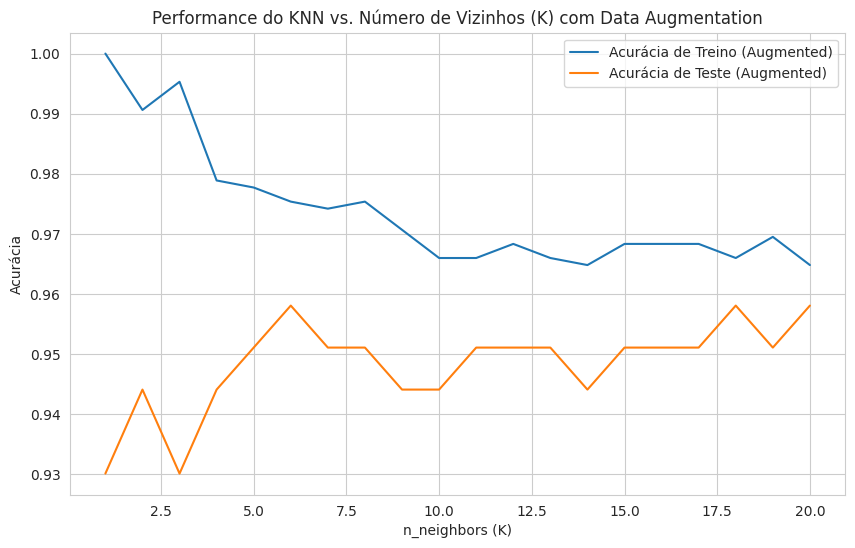


Com dados aumentados:
O melhor K encontrado foi: 6
A maior acurácia de teste observada foi: 0.9580
------------------------------
 
----

----Treinando e avaliando KNN com dados ORIGINAIS (sem aumento), variando K...
Avaliação concluída.


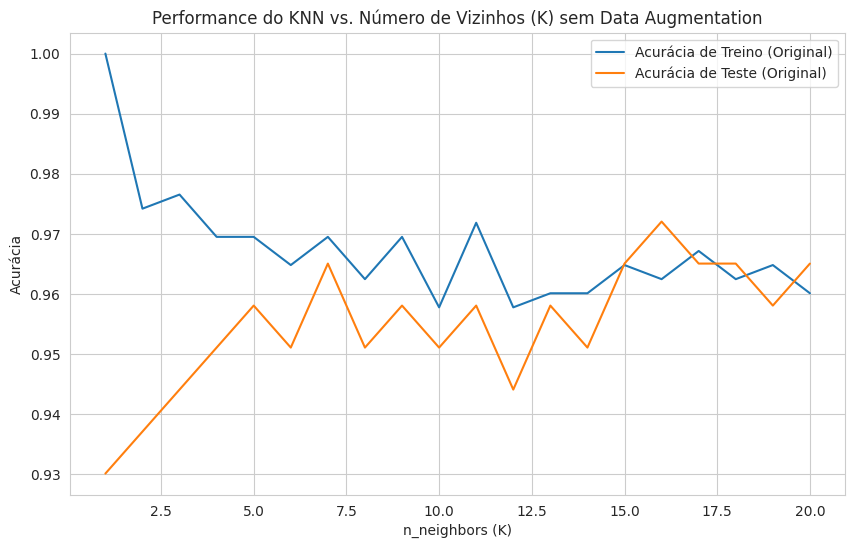


Sem dados aumentados:
O melhor K encontrado foi: 16
A maior acurácia de teste observada foi: 0.9720
------------------------------

Comparativo:
Melhor acurácia de teste COM aumento de dados (0.9580)
Melhor acurácia de teste SEM aumento de dados (0.9720)


In [14]:

df_regressao['Y_classe'] = (df_regressao['Y'] > df_regressao['Y'].median()).astype(int)

# X e y para classificação
X = df_regressao[features_independentes_exemplo]
y = df_regressao['Y_classe']


random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def adiciona_ruido_amplifica_dados():
    noise_factor = 0.1
    X_train_noisy = X_train_scaled + np.random.normal(0, noise_factor, X_train_scaled.shape)
    x_train_aumentado = np.concatenate((X_train_scaled, X_train_noisy))
    y_train_aumentado = np.concatenate((y_train, y_train))
    print(f"Dimensão original do treino: {X_train_scaled.shape}")
    print(f"Dimensão do treino aumentada com ruído: {x_train_aumentado.shape}")
    print("-" * 30)
    return x_train_aumentado, y_train_aumentado

X_train_augmented, y_train_augmented = adiciona_ruido_amplifica_dados()


training_accuracy_aug = []
test_accuracy_aug = []
print("Treinando e avaliando KNN com dados aumentaddoss, variando K...")

neighbors_settings = range(1, 21)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_augmented, y_train_augmented)
    training_accuracy_aug.append(knn.score(X_train_augmented, y_train_augmented))
    test_accuracy_aug.append(knn.score(X_test_scaled, y_test))

print("Avaliação concluída.")

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_aug, label="Acurácia de Treino (Augmented)")
plt.plot(neighbors_settings, test_accuracy_aug, label="Acurácia de Teste (Augmented)")
plt.ylabel("Acurácia")
plt.xlabel("n_neighbors (K)")
plt.title("Performance do KNN vs. Número de Vizinhos (K) com Data Augmentation")
plt.legend()
plt.grid(True)
plt.show()

best_k_aug = neighbors_settings[np.argmax(test_accuracy_aug)]
best_test_accuracy_aug = np.max(test_accuracy_aug)

print(f"\nCom dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_aug}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_aug:.4f}")
print("-" * 30)

training_accuracy_orig = []
test_accuracy_orig = []

print(" \n----\n\n----Treinando e avaliando KNN com dados ORIGINAIS (sem aumento), variando K...")

for n_neighbors in neighbors_settings:
    knn_original = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_original.fit(X_train_scaled, y_train)
    training_accuracy_orig.append(knn_original.score(X_train_scaled, y_train))
    test_accuracy_orig.append(knn_original.score(X_test_scaled, y_test))

print("Avaliação concluída.")

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_orig, label="Acurácia de Treino (Original)")
plt.plot(neighbors_settings, test_accuracy_orig, label="Acurácia de Teste (Original)")
plt.ylabel("Acurácia")
plt.xlabel("n_neighbors (K)")
plt.title("Performance do KNN vs. Número de Vizinhos (K) sem Data Augmentation")
plt.legend()
plt.grid(True)
plt.show()

best_k_orig = neighbors_settings[np.argmax(test_accuracy_orig)]
best_test_accuracy_orig = np.max(test_accuracy_orig)

print(f"\nSem dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_orig}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_orig:.4f}")
print("-" * 30)

print("\nComparativo:")
print(f"Melhor acurácia de teste COM aumento de dados ({best_test_accuracy_aug:.4f})")
print(f"Melhor acurácia de teste SEM aumento de dados ({best_test_accuracy_orig:.4f})")



# Regressão Linear ordinaria

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import statsmodels.formula.api as smf

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

y_regressao = 'mean area'

df_regressao = df_cancer.copy()
df_regressao['Y'] = df_regressao[y_regressao]
df_regressao = df_regressao.drop(columns=[y_regressao])

# x_cols = [col for col in df_regressao.columns if col != 'Y']
df_regressao.columns = df_regressao.columns.str.replace(' ', '_')

features_independentes_exemplo = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_compactness']
formula = 'Y ~ ' + ' + '.join(features_independentes_exemplo)

print("Fórmula da Regressão:", formula)
print("-" * 30)

model = smf.ols(formula=formula, data=df_regressao)

results = model.fit()

print(results.summary())

Fórmula da Regressão: Y ~ mean_radius + mean_texture + mean_perimeter + mean_compactness
------------------------------
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6163.
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:15:35   Log-Likelihood:                -3062.0
No. Observations:                 569   AIC:                             6134.
Df Residuals:                     564   BIC:                             6156.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----